## TF-co-occurences with newly found tf-motifs

#### constant variables and imports

In [14]:
from tfcomb import CombObj
from os import listdir, system, environ, pathsep
from os.path import isfile, join
'''
Constants for this script
'''
genome_path="../testdaten/hg19_masked.fa"
main_jaspar_file="../testdaten/JASPAR2020_CORE_vertebrates.meme" 
result_path="./results/wp5/"

merged_motif_path="../testdaten/wp5/prepared_jaspar_files/"
motif_path="../testdaten/wp5/new_motifs/"
cell_line_path="../testdaten/enhancers/"
cell_line_file_name="CD14+_enhancers.bed"

In [15]:
'''
You need this to use TOBIAS command line tool in your python envrionment
Find the path to the tobias command with:
type TOBIAS
'''
TOBIAS_command="/home/stud6/.conda/envs/tfcomb_env/bin/TOBIAS"
#environ['PATH'] += pathsep + tobias_path
#print(environ['PATH'])


#### function definition for the market basket analyses

In [16]:
def do_market_basket_analyses(genome_path:str,
                              cell_line_name: str,
                              rel_path_cell_line: str,
                              motif_name:str,
                              rel_path_motif:str ):
    '''
        Does market basket analyses for cell line with :cell_line_name and the rel_path: to the region data.
        Saves the data to name.pkl file.
        
        e.g.:
        rel_path: "../testdaten/enhancers/A375_enhancers.bed"
    '''
    print(f'Starting with tfbs-detection and market basket analyses for cell_line: {cell_line_name} and new motif {motif_name}, data path:{rel_path_cell_line}.')
    comb = CombObj()
    comb.TFBS_from_motifs(regions= rel_path_cell_line,
                   motifs=rel_path_motif,
                   genome=genome_path,
                   threads=4)
    print(f'TFBS detection is done for cell_line: {cell_line_name} and new motif {motif_name}')
    print(f'Start market basket analyses for cell line: {cell_line_name} and new motif {motif_name}')
    comb.market_basket(threads=10)
    
    if len(comb.rules) <= 0:
        print(f'Could not find TF-cooccurences for cell line: {cell_line_name} and new motif {motif_name}')
        return
    
    print(f'Finished market basket analyses for cell line: {cell_line_name} and new motif {motif_name}')
    print(f'Found rules: {len(comb.rules)}')
    comb.to_pickle(f'{result_path}{cell_line_name}_{motif_name}_complete.pkl')
    print(f'Saved complete rules to {result_path}{cell_line_name}_{motif_name}_complete.pkl')



#### function definition to read in files of folder

In [17]:
def read_in_file_names_of_folder(rel_path:str):
    return [f for f in listdir(rel_path) if isfile(join(rel_path, f))]

def merge_new_motif_to_jaspar_file(new_motif_file_name: str , new_motif_name: str):
    '''
    Merge a new Motif to a jaspar file with known motifs by using TOBIAS FormatMotif tool
    --input test_data/individual_motifs/*
    '''
    print(f'{TOBIAS_command} FormatMotifs --input {motif_path}{new_motif_file_name}{" "}{main_jaspar_file} --task join --output {merged_motif_path}joined_{new_motif_name}.jaspar')
    system(f'{TOBIAS_command} FormatMotifs --input {motif_path}{new_motif_file_name}{" "}{main_jaspar_file} --task join --output {merged_motif_path}joined_{new_motif_name}.jaspar')



### Market basket analyses with newly found motifs
Idea: WP5 finds motifs for a special cell_line/cluster/tissue e.g. liver cells. WP6 takes the new motifs and tests them for TF-co-occurences in the specific cellline/cluster

In [24]:
new_motif_file_names = read_in_file_names_of_folder(rel_path=motif_path)
#cell_line_names = read_in_file_names_of_folder(rel_path=enhancer_path)
new_motif_names = []

for new_motif_file_name in new_motif_file_names:
    motif_name = new_motif_file_name.split('.')[0]
    new_motif_names.append(motif_name)
    cell_line_name = cell_line_file_name.split('.')[0]

    print(new_motif_file_name)
    print(motif_name)
    print(cell_line_name)
    
    merge_new_motif_to_jaspar_file(new_motif_file_name=new_motif_file_name, new_motif_name=motif_name)
    
    do_market_basket_analyses(genome_path=genome_path, 
                              cell_line_name=cell_line_name,
                              rel_path_cell_line=f"{cell_line_path}{cell_line_file_name}",
                              motif_name=motif_name,
                              rel_path_motif=f"{merged_motif_path}joined_{motif_name}.jaspar"
                             )

motif_10_motif_10.meme
motif_10_motif_10
CD14+_enhancers
/home/stud6/.conda/envs/tfcomb_env/bin/TOBIAS FormatMotifs --input ../testdaten/wp5/new_motifs/motif_10_motif_10.meme ../testdaten/JASPAR2020_CORE_vertebrates.meme --task join --output ../testdaten/wp5/prepared_jaspar_files/joined_motif_10_motif_10.jaspar
# TOBIAS 0.13.2 FormatMotifs (run started 2022-01-09 20:22:24.757863)
# Working directory: /mnt/workspace_stud/stud6/repositories/Datenanalyse-2021/wp6/analyse
# Command line call: TOBIAS FormatMotifs --input ../testdaten/wp5/new_motifs/motif_10_motif_10.meme ../testdaten/JASPAR2020_CORE_vertebrates.meme --task join --output ../testdaten/wp5/prepared_jaspar_files/joined_motif_10_motif_10.jaspar

# ----- Input parameters -----
# input:	['../testdaten/wp5/new_motifs/motif_10_motif_10.meme', '../testdaten/JASPAR2020_CORE_vertebrates.meme']
# output:	../testdaten/wp5/prepared_jaspar_files/joined_motif_10_motif_10.jaspar
# format:	jaspar
# task:	join
# filter:	None
# verbosity:	3


#

### Analyse the co-occurences


['motif_10_motif_10', 'motif_29_motif_29']
['CD14+_enhancers_motif_29_motif_29_complete.pkl', 'CD14+_enhancers_motif_10_motif_10_complete.pkl']
INFO: Selected 561 rules
INFO: Creating subset of object
<CombObj: 169480 TFBS (747 unique names) | Market basket analysis: 561 rules>
INFO: x_threshold is None; trying to calculate optimal threshold
INFO: y_threshold is None; trying to calculate optimal threshold
INFO: Creating subset of TFBS and rules using thresholds
<CombObj: 179652 TFBS (747 unique names) | Market basket analysis: 7110 rules>
INFO: Selected 6 rules
INFO: Creating subset of object
<CombObj: 6505 TFBS (747 unique names) | Market basket analysis: 6 rules>
                         TF1        TF2  TF1_TF2_count  TF1_count  TF2_count  \
motif_29-MAZ        motif_29        MAZ             58        544       2346   
motif_29-ZNF263     motif_29     ZNF263             40        544       1462   
motif_29-INSM1      motif_29      INSM1             18        544        416   
motif_

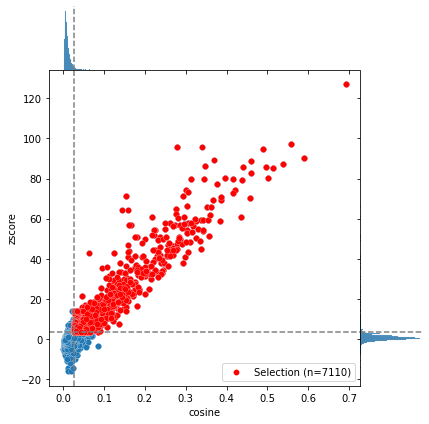

In [35]:
results_files_names_market_basket_analyses= read_in_file_names_of_folder(rel_path=result_path)

print(new_motif_names)


#for file_name in results_files_names_market_basket_analyses:    

# Example, just taking the first analyses
print(results_files_names_market_basket_analyses)
A = CombObj().from_pickle(f"{result_path}{results_files_names_market_basket_analyses[0]}")
A.prefix = "CD4+"

not_sig = A.select_TF_rules(['motif_29'], TF2=False)
print(not_sig)

significant = A.select_significant_rules()
print(significant)
selected3 = significant.select_TF_rules(['motif_29'], TF2=False)
print(selected3)
print(selected3.rules)
    

In [28]:
selected3

<CombObj: 187071 TFBS (747 unique names) | Market basket analysis: 272439 rules>